In [1]:
%matplotlib notebook

In [2]:
import getCycles
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def trans(sigma_path0,net1,N,typ = 0, thr = 0):
    """
    transiton function. net1 is the network that generates the ttransitions
    
    If sigma_path0 is a binary vector it generates the corresponding transtions.
    
    If sigma_path0 is a list of binary vectors it generates a list with the corresponding transtions.
    
    typ determins if the neuron activation state is defined in {-1,1} or {0,1} 
    typ=1 --> {-1,1}    typ=0 --> {0,1} 
    """
    sigma_path1 = net1.dot(sigma_path0.T)
    print(sigma_path1)
    sigma_path1 [sigma_path1  == 0] = 0.000001
    print(sigma_path1)
    sigma_path1 = (1-typ+np.sign(sigma_path1 +thr))/(2-typ)
    print(sigma_path1)
    return sigma_path1.T   

In [42]:
N= 1000 # Number of neurons
typ = 0 # typ = 0 neurons with binary activation states {0,1}, typ = 1  neurons with states {-1,1}.
        # typ=1 --> {-1,1}    typ=0 --> {0,1} 
thr = 0 # activation function threshold
nP = {"N":N, "typ":typ, "thr": thr}

In [43]:
s0 = np.random.binomial(1, 0.5, N)
print(s0.shape)
print(s0)

(1000,)
[0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1
 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1
 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1
 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 

In [44]:
#genero una rete casuale con seme 'seed' (connessioni casuali tra nodi)
#G=nx.watts_strogatz_graph(N,20,0.1,3345)
#genero matrice delle adiacenze di G
#C=nx.adjacency_matrix(G).todense()
#assegnazione dei pesi random ai collegamenti 
# (per generazione matrice di pesi uso seme 'seed') (?)
pesi=2*np.random.rand(N,N)-1
net1=pesi#np.multiply(pesi,C)
print(net1.shape)

(1000, 1000)


<IPython.core.display.Javascript object>


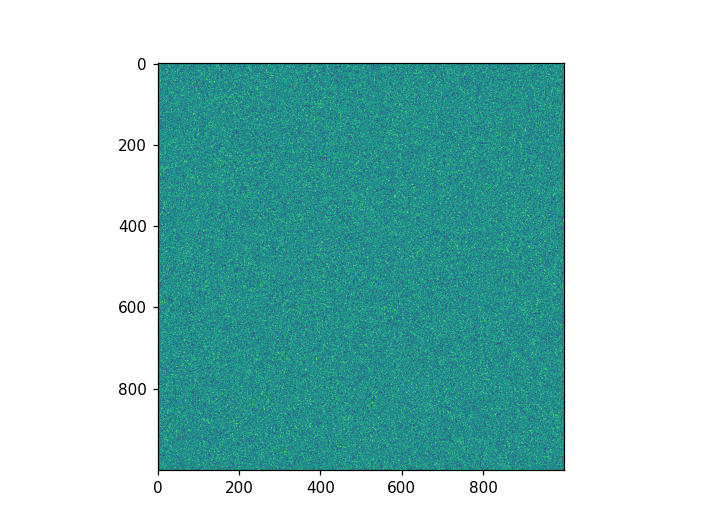

In [45]:
plt.figure()
plt.imshow(net1)

In [46]:
print(s0.T)
print(net1)
sigma_path1 = np.dot(net1,s0).T
print(sigma_path1.dtype)
print(sigma_path1)

[0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1
 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1
 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1
 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 0 1 0 1 

In [47]:
states = s0.reshape((1,N))
print(states.shape)

s1 = getCycles.transPy(s0,net1,N,typ = 0, thr = 0)
print(s1.reshape((1,N)).shape)

np.stack([states,s1.reshape((1,N))])

(1, 1000)
(1, 1000)


array([[[0., 1., 0., ..., 1., 1., 0.]],

       [[1., 1., 1., ..., 0., 0., 0.]]])

In [48]:
states = np.array(s0)
print(states)

[0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1
 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1
 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1
 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 0 1 0 1 

In [51]:
passi = 3000
states = np.zeros((passi,N))

states[0,:] = s0

for i in range(1,passi):
    s1 = getCycles.transPy(s0,net1,N,typ = 0, thr = 0)
    #print(s1)
    s0=s1.T
    states[i,:] = s1.T

<IPython.core.display.Javascript object>


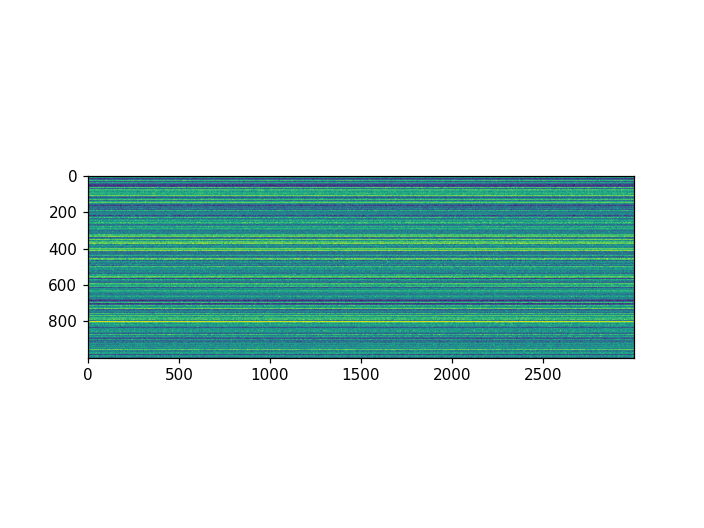

In [52]:
plt.figure()
plt.imshow(states.T)

# Parcellizzazione
https://www.sciencedirect.com/science/article/pii/S2211124720314601?via%3Dihub

In [53]:
%ls

getCyclesAsy.py
getCycles.py
getCycles.pyc
HowToHRNN.ipynb
hrnn.cpp
hrnn.cpython-37m-x86_64-linux-gnu.so*
multiprocessinRunRHNN.py
newSim.ipynb
picco-asym.png
__pycache__/
README.md
Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_2mm.Centroid_RAS.csv
single_hrnn_run.py
test1.py
test2.py


<IPython.core.display.Javascript object>


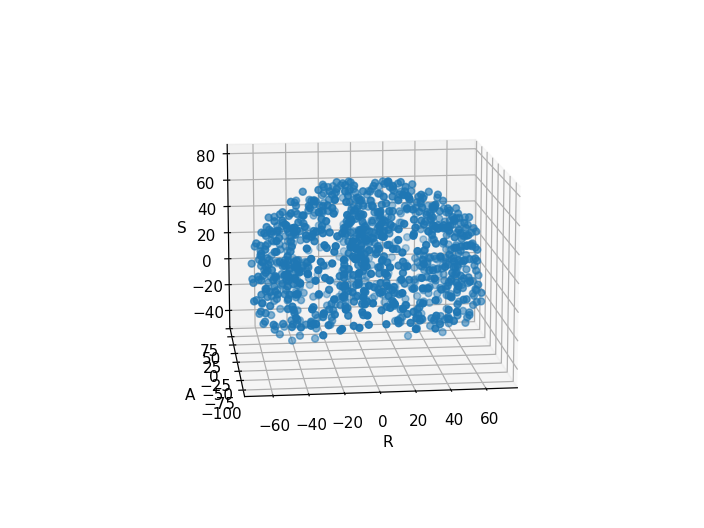

Text(0.5, 0, 'S')

In [97]:
df = pd.read_csv('Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_2mm.Centroid_RAS.csv')
df.head()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X = df['R']
Y = df['A']
Z = df['S']

ax.scatter(X, Y, Z)

ax.set_xlabel('R')
ax.set_ylabel('A')
ax.set_zlabel('S')

In [98]:
coords = np.array([X,Y,Z]).T

def euc(listCoords):
    return np.array([[ np.linalg.norm(i-j) for j in listCoords] for i in listCoords])

def euc2(listCoords):
    return np.array([[np.sum((i-j)**2) for j in listCoords] for i in listCoords])

dist = euc(coords)
dist.shape

dist2=np.sqrt(euc2(coords))

<IPython.core.display.Javascript object>


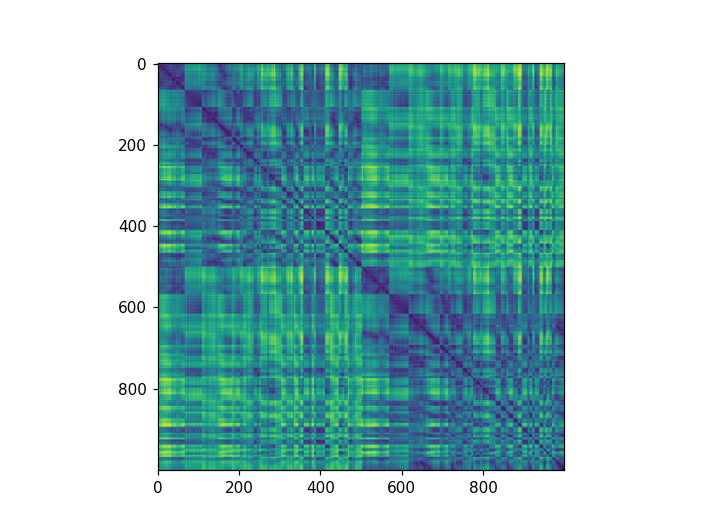

<IPython.core.display.Javascript object>


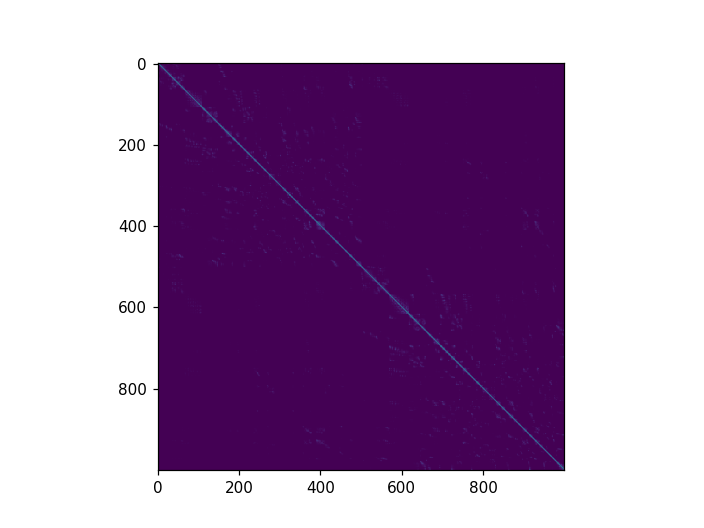

<IPython.core.display.Javascript object>


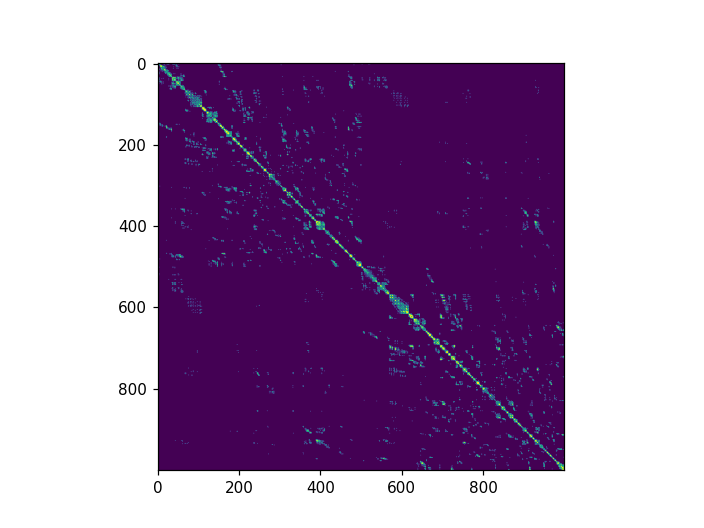

In [99]:
plt.figure()
plt.imshow(dist)

J = np.exp(-0.18*dist)
plt.figure()
plt.imshow(J)

plt.figure()
plt.imshow(J>0.04)

# Spin

<IPython.core.display.Javascript object>


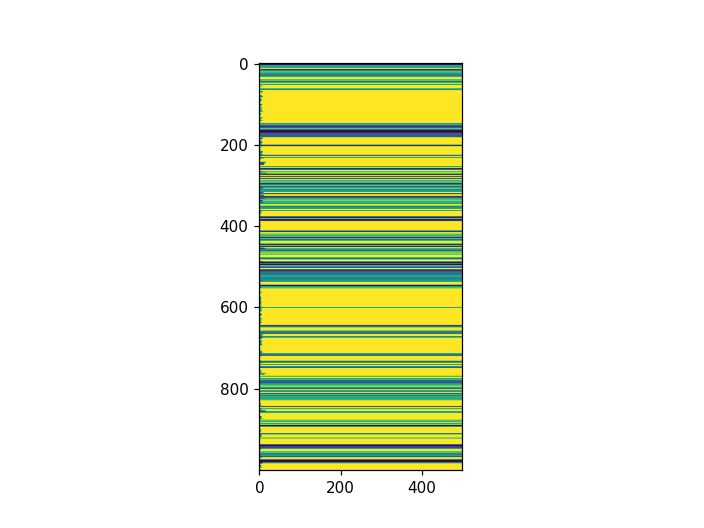

<IPython.core.display.Javascript object>


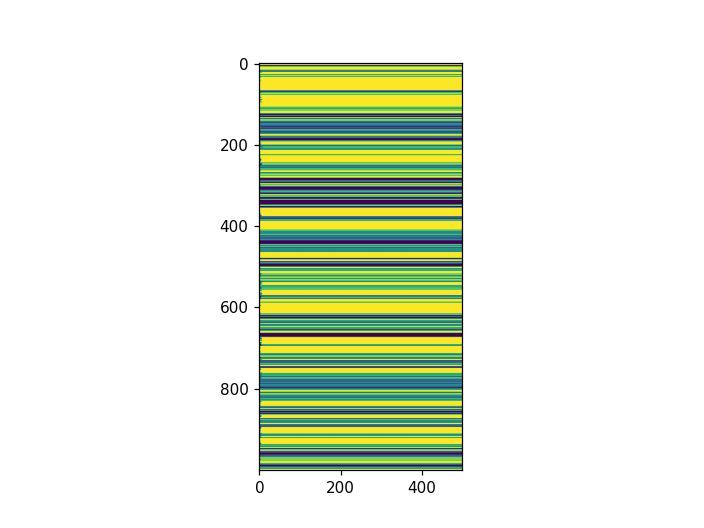

<IPython.core.display.Javascript object>


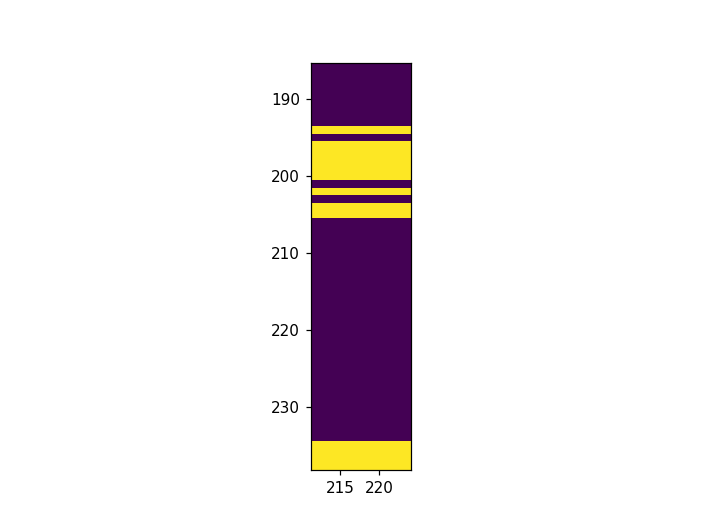

In [144]:
runs = 3
passi = 500
states = np.zeros((runs,passi,N))

for r in range(runs):
    s0 = 2*np.random.binomial(1, 0.5, N)-1
    states[r,0,:] = s0

    for t in range(1,passi):
        s1 = getCycles.transPy(s0,J,N,typ = 1, thr = 0)
        #print(s1)
        s0=s1.T
        states[r,t,:] = s1.T

    plt.figure()
    plt.imshow(states[r,:,:].T)

In [145]:
uniqDist = np.unique(dist)
#plt.figure()
#plt.hist(uniqDist,bins=100)
ii,jj=np.mgrid[0:N, 0:N]
#print(ii)
#print(jj)

Bd = [[] for r in range(runs)]

for r in range(runs):
    for d in uniqDist:
        #print(d,np.sum(dist==d))
        iList = ii[dist==d]
        jList = jj[dist==d]
        cors = []
        for i,j in zip(iList,jList):
            cor = np.mean(states[r,:,i]*states[r,:,j])
            cors.append(cor)
        Bd[r].append(np.mean(cors))


<IPython.core.display.Javascript object>


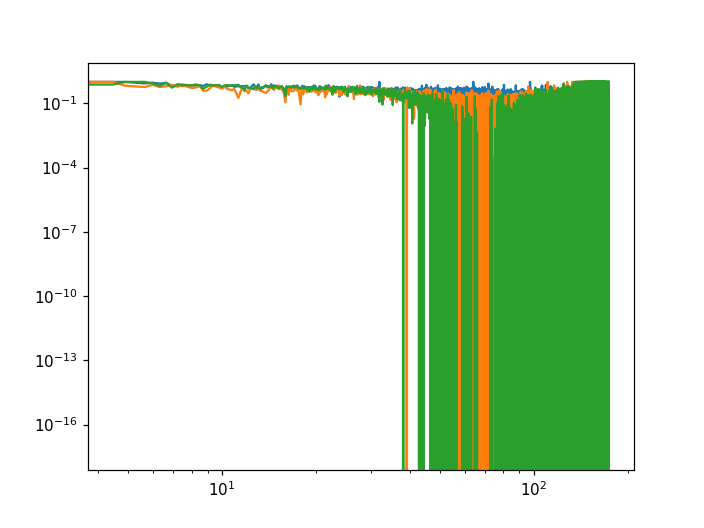

<IPython.core.display.Javascript object>


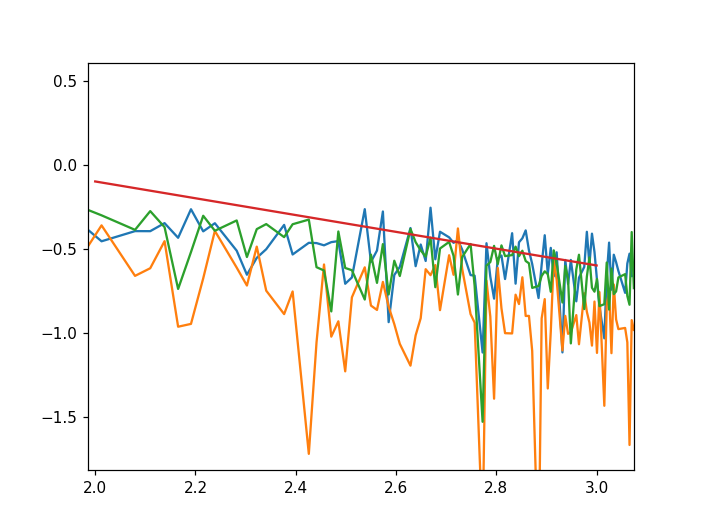

/home/gosti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/home/gosti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


In [148]:
plt.figure()
for r in range(runs):
    plt.plot(uniqDist,Bd[r])
plt.loglog()

plt.figure()
for r in range(runs):
    plt.plot(np.log(uniqDist),np.log(Bd[r]))
plt.plot([2,3],[-0.1,-0.1 -0.5])

<IPython.core.display.Javascript object>


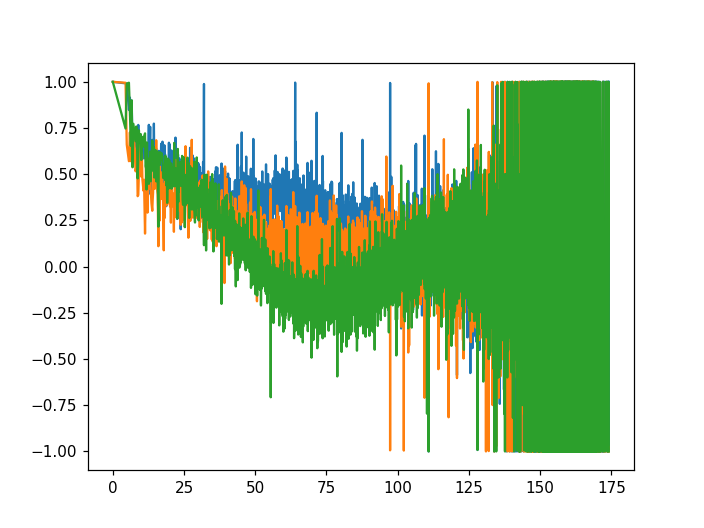

In [149]:
cors = []
ts = range(1,passi)
for t in ts:
    cor = np.mean(states[r,:-t,:]*states[r,t:,:])
    cors.append(cor)

plt.figure()
for r in range(runs):
    plt.plot(uniqDist,Bd[r])

# Neuron

<IPython.core.display.Javascript object>


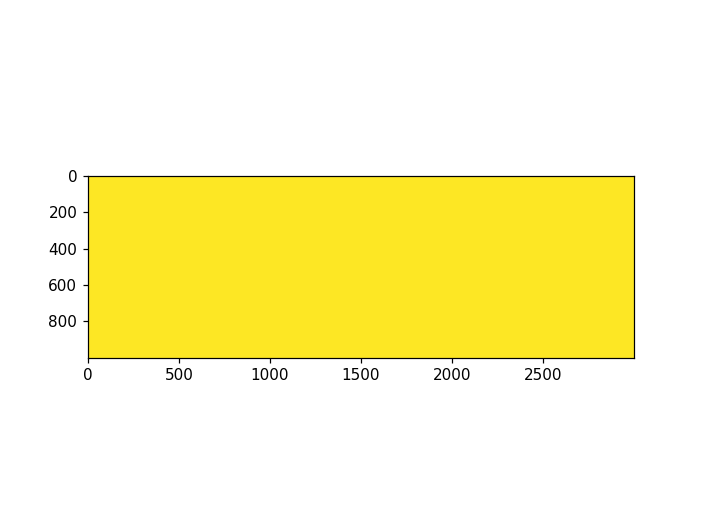

In [107]:
passi = 3000
states = np.zeros((passi,N))

s0 = np.random.binomial(1, 0.5, N)
states[0,:] = s0

for t in range(1,passi):
    s1 = getCycles.transPy(s0,J,N,typ = 0, thr = 0)
    #print(s1)
    s0=s1.T
    states[t,:] = s1.T
    
plt.figure()
plt.imshow(states.T)

In [108]:
uniqDist = np.unique(dist)
#plt.figure()
#plt.hist(uniqDist,bins=100)
ii,jj=np.mgrid[0:N, 0:N]
#print(ii)
#print(jj)

Bd = []

for d in uniqDist:
    #print(d,np.sum(dist==d))
    iList = ii[dist==d]
    jList = jj[dist==d]
    cors = []
    for i,j in zip(iList,jList):
        cor = np.mean(states[:,i]*states[:,j])
        cors.append(cor)
    Bd.append(np.mean(cors))


<IPython.core.display.Javascript object>


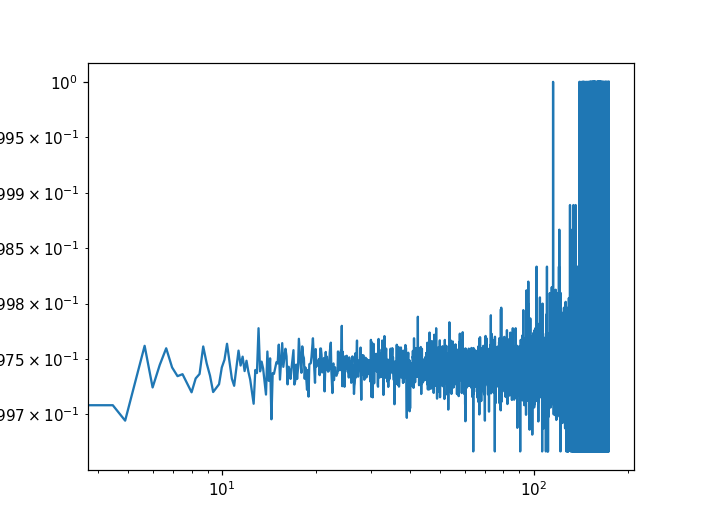

<IPython.core.display.Javascript object>


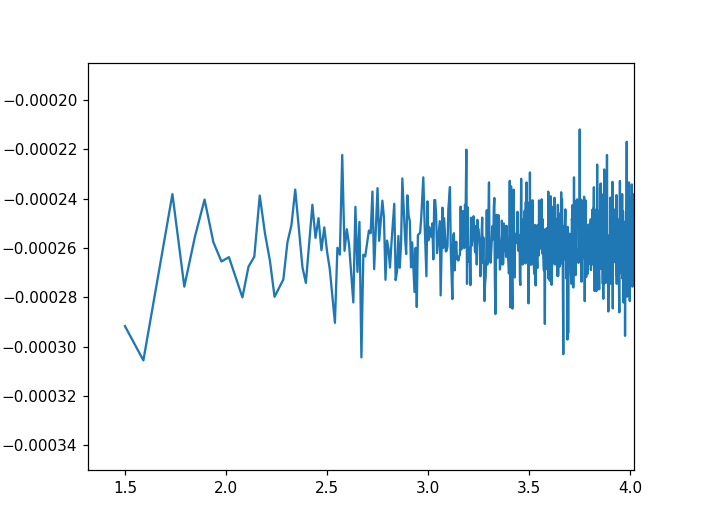

/home/gosti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [109]:
plt.figure()
plt.plot(uniqDist,Bd)
plt.loglog()

plt.figure()
plt.plot(np.log(uniqDist),np.log(Bd))

# Neuron with Asymmetry

<IPython.core.display.Javascript object>


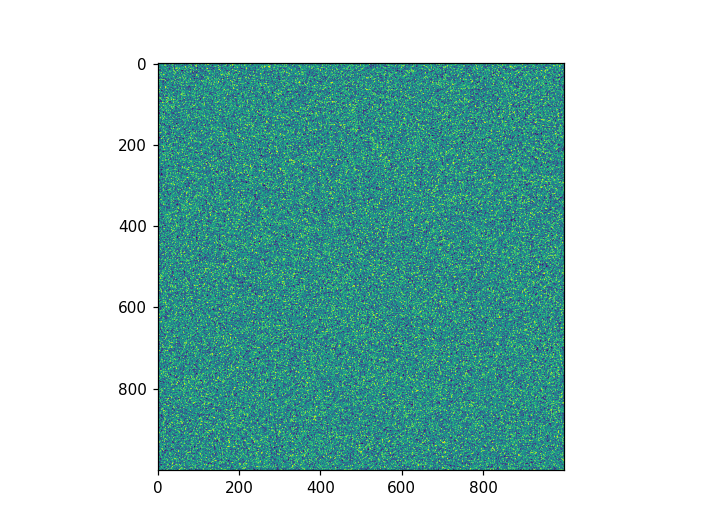

<IPython.core.display.Javascript object>


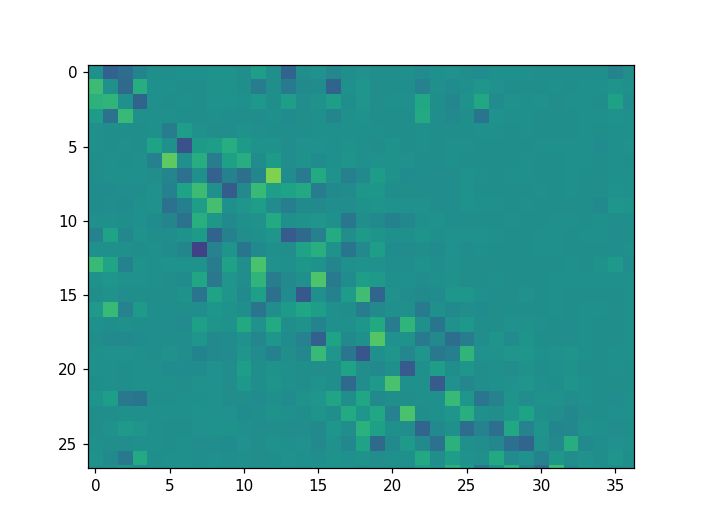

True

In [122]:
signs = s0 = 2*np.random.binomial(1, 0.5, (N,N))-1
for i in range(N):
    for j in range(i,N):
        signs[j,i] = - signs[i,j]
for i in range(N):
    signs[i,i] = 0 
plt.figure()
plt.imshow(signs)

plt.figure()
plt.imshow(signs*J)
signs[50,20] == - signs[20,50]

<IPython.core.display.Javascript object>


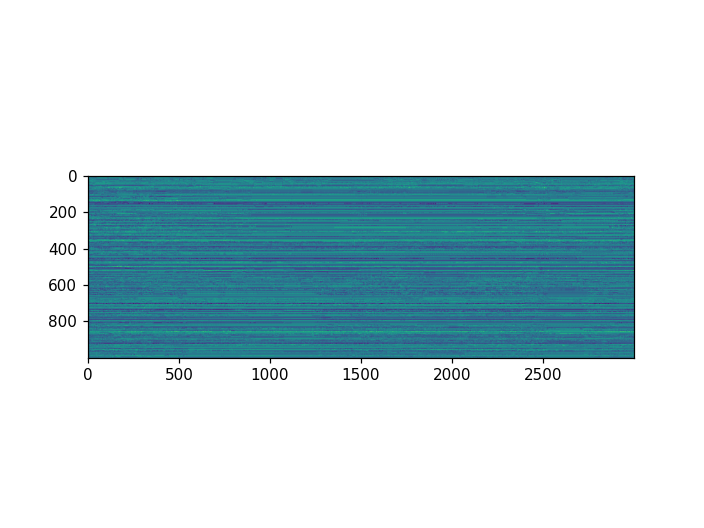

<IPython.core.display.Javascript object>


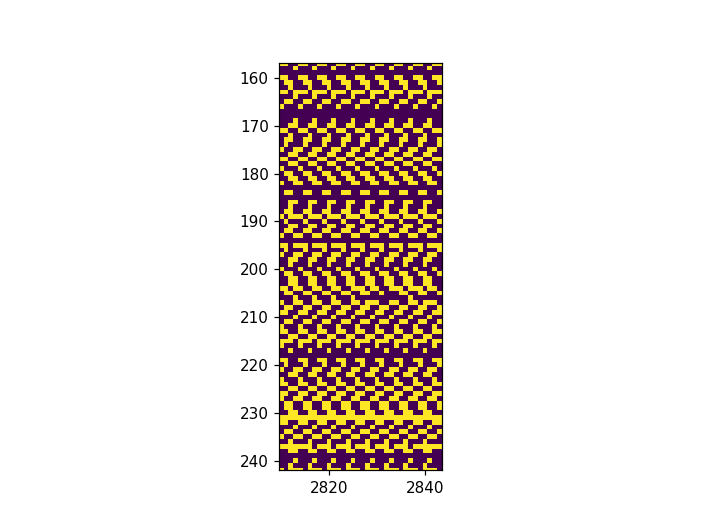

<IPython.core.display.Javascript object>


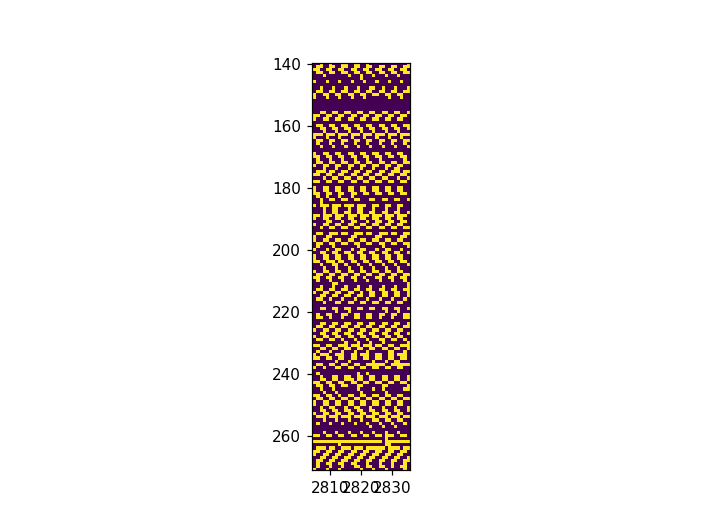

In [139]:
runs = 3
passi = 3000
states = np.zeros((runs,passi,N))
Jas = signs*J


for r in range(runs):
    s0 = np.random.binomial(1, 0.1, N)
    states[r,0,:] = s0

    for t in range(1,passi):
        s1 = getCycles.transPy(s0,Jas,N,typ = 0, thr = 0)
        #print(s1)
        s0=s1.T
        states[r,t,:] = s1.T

    plt.figure()
    plt.imshow(states[r,:,:].T)



In [140]:
uniqDist = np.unique(dist)
#plt.figure()
#plt.hist(uniqDist,bins=100)
ii,jj=np.mgrid[0:N, 0:N]
#print(ii)
#print(jj)

Bd = [[] for r in range(runs)]

for r in range(runs):
    for d in uniqDist:
        #print(d,np.sum(dist==d))
        iList = ii[dist==d]
        jList = jj[dist==d]
        cors = []
        for i,j in zip(iList,jList):
            cor = np.mean(states[r,:,i]*states[r,:,j])
            cors.append(cor)
        Bd[r].append(np.mean(cors))


<IPython.core.display.Javascript object>


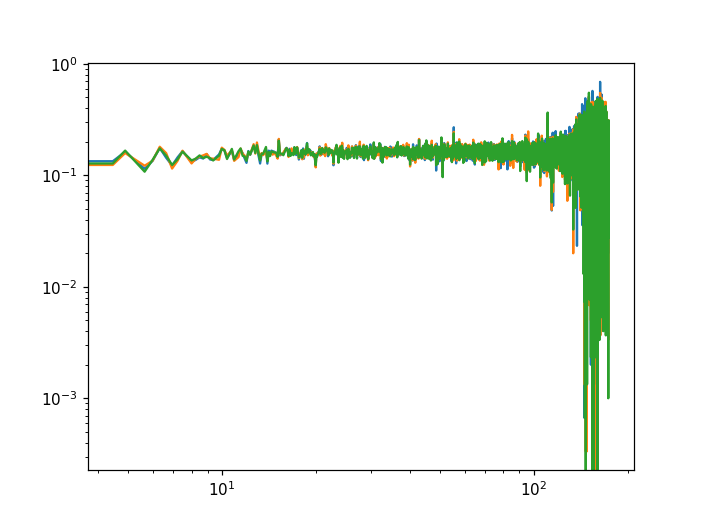

<IPython.core.display.Javascript object>


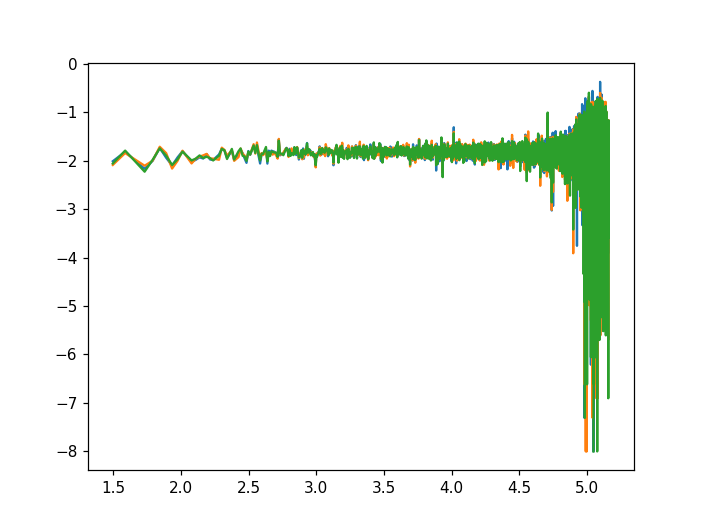

/home/gosti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [141]:
plt.figure()
for r in range(runs):
    plt.plot(uniqDist,Bd[r])
plt.loglog()

plt.figure()
for r in range(runs):
    plt.plot(np.log(uniqDist),np.log(Bd[r]))

<IPython.core.display.Javascript object>


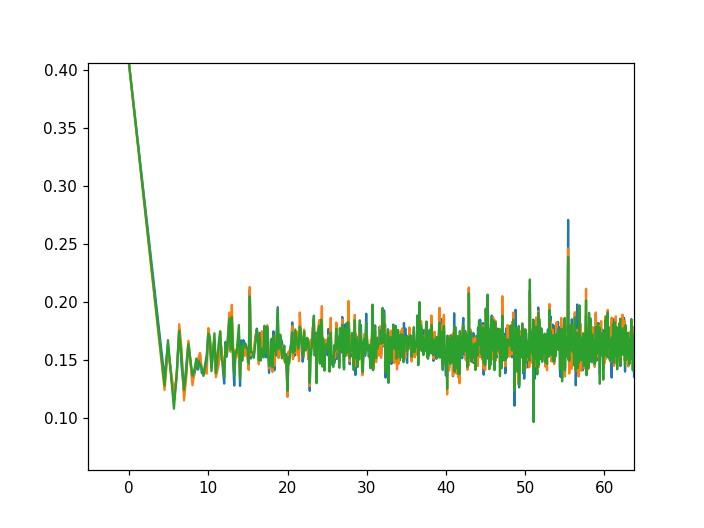

In [143]:
cors = []
ts = range(1,passi)
for t in ts:
    cor = np.mean(states[r,:-t,:]*states[r,t:,:])
    cors.append(cor)

plt.figure()
for r in range(runs):
    plt.plot(uniqDist,Bd[r])

In [136]:
states[0,:0,:].shape

(0, 1000)